In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
from google.colab import drive
drive.mount('/content/drive')

file_path='/content/drive/MyDrive/Machine Learning- Session/Course Work Project/Updated_feature_meta.csv' #zainab's
file_path1='/content/drive/MyDrive/Machine Learning- Session/Course Work Project/Updated_feature_test.csv' #zainab's
file_path2='/content/drive/MyDrive/Machine Learning- Session/Course Work Project/Updated_feature_kaggle.csv' #zainab's

#file_path='/content/drive/My Drive/Course Dataset/metadata.csv' #kirti's
#file_path1='/content/drive/My Drive/Course Dataset/metadata_test.csv' #kirti's
#file_path2='/content/drive/My Drive/Course Dataset/metadata_kaggle.csv' #kirti's
df_metadata=pd.read_csv(file_path)
df_metadata_test=pd.read_csv(file_path1)
df_metadata_kaggle=pd.read_csv(file_path2)

Mounted at /content/drive


In [4]:
# Reorder columns in df_test
df_metadata_test = df_metadata_test.reindex(columns=df_metadata.columns)

# Reorder columns in df_kaggle
df_metadata_kaggle = df_metadata_kaggle.reindex(columns=df_metadata.columns)

In [5]:
# Extract features and target
X = df_metadata.drop(columns=['activity', 'user_snippet'])  # Features (excluding 'activity' and 'user_snippet')
y = df_metadata['activity']
X_test_df = df_metadata_test.drop(columns=['activity', 'user_snippet'])
y_test_df = df_metadata_test['activity']

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_df_scaled=scaler.transform(X_test_df)

In [8]:
lg_model = LogisticRegression(multi_class="ovr")


In [9]:
lg_model.fit(X_train, y_train)

# Apply the trained model to your unseen test data
predictions = lg_model.predict(X_test)

accuracy =lg_model.score(X_test, y_test)
accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7535657686212361

In [10]:
# Evaluate the performance of the model on the test data
accuracy =lg_model.score(X_test_df, y_test_df)
print("Accuracy on test data:", accuracy)

Accuracy on test data: 0.7414684591520165


# Hyperparameter tuning using grid search

In [11]:
# Define the hyperparameters grid
param_grid = {
    'C': [1.5, 2, 2.5, 3, 4, 5 ],  # Regularization parameter ,0.001, 0.01, 0.1, 0.15, 0.25, 1, 1.5, 2,
    'penalty': [ 'l2']  # Penalty norm
}

In [12]:
# Initialize logistic regression model
lg_model = LogisticRegression(multi_class="ovr", max_iter=1000, random_state=42,  class_weight='balanced')  #

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lg_model, param_grid=param_grid, cv=10, scoring='accuracy')


In [13]:
# Perform grid search
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 4, 'penalty': 'l2'}


In [14]:
# Get the best model
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_scaled)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8946117274167987


In [15]:
# Predict on the test set using the best model
y_pred_test = best_model.predict(X_test_df_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test_df, y_pred_test)
print("Accuracy:", accuracy)


Accuracy: 0.8407445708376422


In [ ]:
pip install tabulate

In [16]:
from sklearn.metrics import classification_report
from tabulate import tabulate
class_report_str = classification_report(y_test_df, y_pred_test)

# Convert the classification report string to a list of lines
class_report_lines = class_report_str.split('\n')

# Remove empty lines and headers
class_report_lines = [line.split() for line in class_report_lines if line.strip() and line.strip() != 'precision']

# Print the classification report table
headers = class_report_lines[0]
data = class_report_lines[1:]

print("Classification Report:")
print(tabulate(data, headers=headers, tablefmt='grid'))

Classification Report:
+------------+-------------+----------+------------+-----------+
|            | precision   |   recall |   f1-score |   support |
+============+=============+==========+============+===========+
| Downstairs | 0.47        |     0.56 |       0.51 |    174    |
+------------+-------------+----------+------------+-----------+
| Jogging    | 0.94        |     0.98 |       0.96 |    689    |
+------------+-------------+----------+------------+-----------+
| Sitting    | 0.58        |     1    |       0.73 |     22    |
+------------+-------------+----------+------------+-----------+
| Standing   | 1.00        |     0.58 |       0.74 |     43    |
+------------+-------------+----------+------------+-----------+
| Upstairs   | 0.83        |     0.52 |       0.64 |    238    |
+------------+-------------+----------+------------+-----------+
| Walking    | 0.86        |     0.89 |       0.87 |    768    |
+------------+-------------+----------+------------+-----------+
| 

\# Applying best model on Test Data

In [18]:
X_Kaggle = df_metadata_kaggle.drop(columns=['user_snippet', 'activity'])
X_kaggle_scaled = scaler.transform(X_Kaggle)

In [19]:

y_kaggle_pred = best_model.predict(X_kaggle_scaled)

In [20]:

# Specify path within Google Drive
predictions_file_path = '/content/drive/MyDrive/Machine Learning- Session/Course Work Project/predictions_sandbox2.csv'

# Save predictions for the Kaggle data to a CSV file
df_metadata_kaggle['prediction'] = y_kaggle_pred
df_metadata_kaggle.to_csv(predictions_file_path, columns=['user_snippet', 'prediction'], index=False)

print("Predictions for Kaggle data saved to:", predictions_file_path)

Predictions for Kaggle data saved to: /content/drive/MyDrive/Machine Learning- Session/Course Work Project/predictions_sandbox2.csv


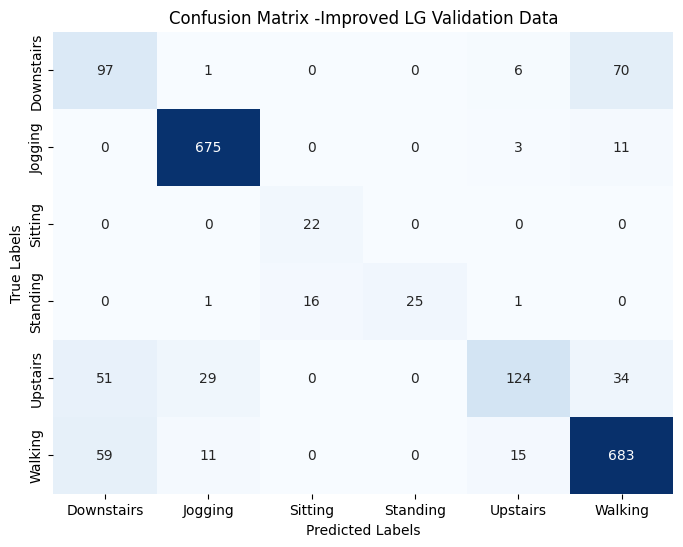

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Predict on the test set using the best model
y_pred_test = best_model.predict(X_test_df_scaled)

# Get unique labels
labels = sorted(y_test_df.unique())

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_df, y_pred_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix -Improved LG Validation Data")
plt.show()

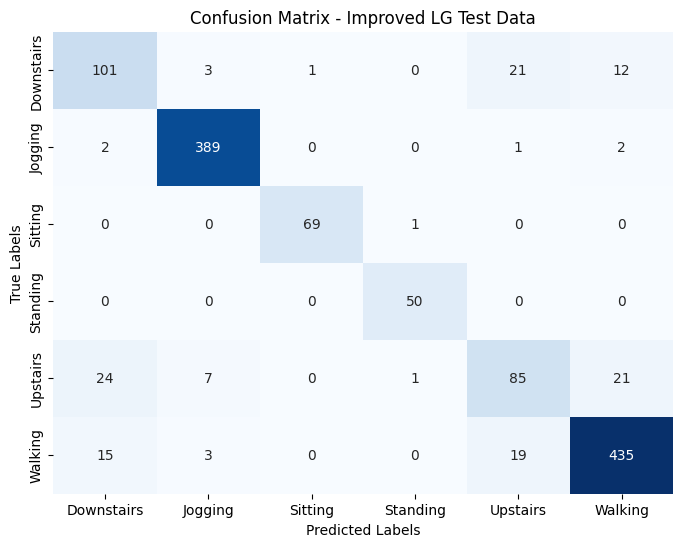

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Predict on the test set using the best model
y_pred = best_model.predict(X_test_scaled)

# Get unique labels
labels = sorted(y_test_df.unique())

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Improved LG Test Data")
plt.show()

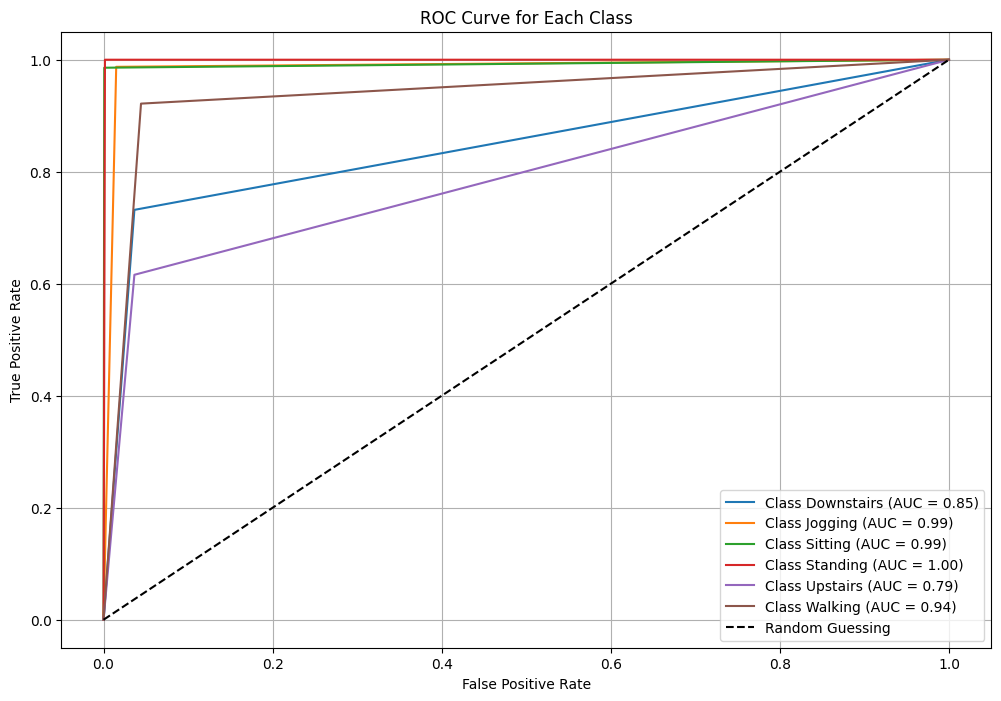

In [23]:
from sklearn.metrics import roc_curve, auc

# Plot ROC curve for each class
plt.figure(figsize=(12, 8))
for label in labels:
    fpr, tpr, _ = roc_curve(y_test == label, y_pred == label)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

